In [9]:
import requests
import datetime
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [10]:
# Pretty print the JSON
import uuid
from IPython.display import display_javascript, display_html, display
import json

class RenderJSON(object):
    def __init__(self, json_data):
        if isinstance(json_data, dict):
            self.json_str = json.dumps(json_data)
        else:
            self.json_str = json_data
        self.uuid = str(uuid.uuid4())

    def _ipython_display_(self):
        display_html('<div id="{}" style="height: 600px; width:100%;"></div>'.format(self.uuid), raw=True)
        display_javascript("""
        require(["https://rawgit.com/caldwell/renderjson/master/renderjson.js"], function() {
        document.getElementById('%s').appendChild(renderjson(%s))
        });
        """ % (self.uuid, self.json_str), raw=True)

# Current prices: 

In [12]:
def price(symbol, comparison_symbols=['USD'], exchange=''):
    url = 'https://min-api.cryptocompare.com/data/price?fsym={}&tsyms={}'\
            .format(symbol.upper(), ','.join(comparison_symbols).upper())
    if exchange:
        url += '&e={}'.format(exchange)
    page = requests.get(url)
    data = page.json()
    return data

In [13]:
price('LTC', exchange='Coinbase')

{'USD': 24.28}

In [14]:
price('NEO', ['BTC', 'ETH', 'USD'])

{'BTC': 0.001766, 'ETH': 0.06778, 'USD': 6.28}

## Daily historical prices:

In [15]:
def daily_price_historical(symbol, comparison_symbol, limit=1, aggregate=1, exchange='', allData='true'):
    url = 'https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym={}&limit={}&aggregate={}&allData={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate, allData)
    if exchange:
        url += '&e={}'.format(exchange)
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    return df

In [16]:
def price(symbol, comparison_symbols=['USD'], exchange=''):
    url = 'https://min-api.cryptocompare.com/data/price?fsym={}&tsyms={}'\
            .format(symbol.upper(), ','.join(comparison_symbols).upper())
    if exchange:
        url += '&e={}'.format(exchange)
    page = requests.get(url)
    data = page.json()
    return data

In [17]:
df = daily_price_historical('BTC', 'USD')
print('Max length = %s' % len(df))
print('Max time = %s' % (df.timestamp.max() - df.timestamp.min()))
df.head()

Max length = 3069
Max time = 3067 days 23:00:00


,close,high,low,open,time,volumefrom,volumeto,timestamp
0,0.04951,0.04951,0.04951,0.04951,1279324800,20.00,0.9902,2010-07-16 20:00:00
1,0.08584,0.08585,0.05941,0.04951,1279411200,75.01,5.0900,2010-07-17 20:00:00
2,0.08080,0.09307,0.07723,0.08584,1279497600,574.00,49.6600,2010-07-18 20:00:00
3,0.07474,0.08181,0.07426,0.08080,1279584000,262.00,20.5900,2010-07-19 20:00:00
4,0.07921,0.07921,0.06634,0.07474,1279670400,575.00,42.2600,2010-07-20 20:00:00


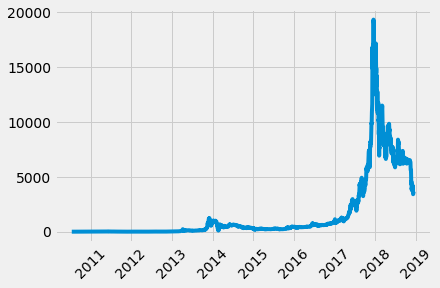

In [18]:
plt.plot(df.timestamp, df.close)
plt.xticks(rotation=45)
plt.show()

In [27]:
from IPython.core.debugger import set_trace

def hourly_price_historical(symbol, comparison_symbol, limit, aggregate, apikey, exchange=''):
    url = 'https://min-api.cryptocompare.com/data/histohour?fsym={}&tsym={}&limit={}&aggregate={}&api_key={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate, apikey)
    if exchange:
        url += '&e={}'.format(exchange)
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    # set_trace()
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    return df

def minute_price_historical(symbol, comparison_symbol, limit, aggregate, apikey, exchange=''):
    url = 'https://min-api.cryptocompare.com/data/histominute?fsym={}&tsym={}&limit={}&aggregate={}&api_key={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate, apikey)
    if exchange:
        url += '&e={}'.format(exchange)
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    # set_trace()
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    return df

Max length = 1441
Max time = 1 days 00:00:00


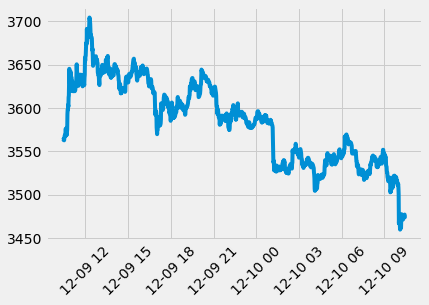

In [30]:
# how to grab data over a period of time going back? I can only seem to get 2000 data points at a time

apikey = '1b8e99d10b1a38bf4c07638f58d81d3aeb33e0c6ef7f3d9e20cb962ce55b9d06'
time_delta = 1 # Bar width in hours
days = 1
limit = days * 24 * 60
df = minute_price_historical('BTC', 'USD', limit, time_delta, apikey)
print('Max length = %s' % len(df))
print('Max time = %s' % (df.timestamp.max() - df.timestamp.min()))

plt.plot(df.timestamp, df.close)
plt.xticks(rotation=45)
plt.show()